In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from pandas import Series, DataFrame
%matplotlib inline


# Read Dataset

In [130]:
df = pd.read_csv('ml_test_2.csv')
df.head()

,id,spender,churned,store_usage,level,platform,cashSpent,country,cityPopulation,cityAverageInvestment,cityHasPve,days_played,churned_day_actions,action_before_churnday
0,59bd4adc4746d448bedc29e4,0,1,0.0,1,Android,0,FR,1,0,False,60,1,0
1,5778cde45312fb6503ee71f6,0,1,0.0,1,Android,0,US,1,0,False,14,1,0
2,5a833a636b0c6f1df678e419,0,1,0.0,1,IPhonePlayer,0,US,1,0,False,36,1,0
3,57365ad91f5d96f720cc8ed4,0,1,0.0,1,Android,0,NL,1,0,False,24,3,0
4,57898c8e5cb109c15fc6c156,0,1,0.0,1,Android,0,US,1,0,False,29,1,1


Delete the first column - players' id 

In [131]:
df_train = df.drop(df.columns[[0]], axis=1) 
df_train

,spender,churned,store_usage,level,platform,cashSpent,country,cityPopulation,cityAverageInvestment,cityHasPve,days_played,churned_day_actions,action_before_churnday
0,0,1,0.00,1,Android,0,FR,1,0,False,60,1,0
1,0,1,0.00,1,Android,0,US,1,0,False,14,1,0
2,0,1,0.00,1,IPhonePlayer,0,US,1,0,False,36,1,0
3,0,1,0.00,1,Android,0,NL,1,0,False,24,3,0
4,0,1,0.00,1,Android,0,US,1,0,False,29,1,1
5,0,1,0.00,1,Android,0,NL,1,0,False,22,1,0
6,0,1,0.00,1,Android,0,US,1,0,False,15,1,0
7,0,1,0.00,1,IPhonePlayer,0,HK,1,0,False,67,1,0
8,0,1,0.00,1,Android,0,RU,1,0,False,11,1,0
9,0,1,0.00,1,IPhonePlayer,0,CN,1,0,False,36,1,0


Now, we take a look at the distribution of cashSpent. 

In [132]:
payer = df_train['cashSpent'] > 0
paid_player = df_train['spender'] == 1
payerss= df[payer & paid_player][['spender', 'platform','cashSpent', 'cityAverageInvestment']]
payerss

,spender,platform,cashSpent,cityAverageInvestment
4475,1,Android,199,0
6704,1,Android,2499,0
8532,1,Android,3999,0
13655,1,Android,1499,0
14874,1,Android,1499,0
18792,1,IPhonePlayer,199,0
22904,1,IPhonePlayer,3999,0
26381,1,WebGLPlayer,199,0
28393,1,IPhonePlayer,999,0
30352,1,IPhonePlayer,3999,0


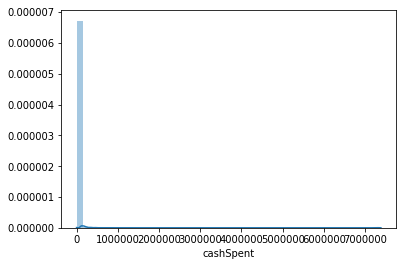

In [133]:
#histogram
sns.distplot(payerss['cashSpent']);

Describe the cashSpent of df_train dataset: 

In [134]:
df_train['cashSpent'].describe()

count    7.352350e+05
mean     1.667521e+03
std      1.857390e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.383364e+06
Name: cashSpent, dtype: float64

Describe the cashSpent of payerss dataset: 

In [135]:
payerss['cashSpent'].describe()

count    1.125360e+05
mean     1.089447e+04
std      4.640502e+04
min      1.990000e+02
25%      9.980000e+02
50%      2.298000e+03
75%      8.495000e+03
max      7.383364e+06
Name: cashSpent, dtype: float64

We can tell from the above numbers and histogram that cashSpent is not normally distributed. 

In [136]:
top_payer = df_train['cashSpent'] > 300000
paid_player = df_train['spender'] == 1
over_30k= df[top_payer & paid_player][['spender', 'platform','cashSpent', 'cityAverageInvestment']]



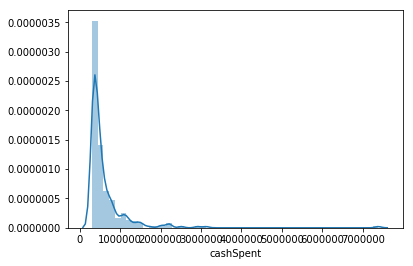

In [137]:
#payers who spent 3000 and their cashSpent histogram
sns.distplot(over_30k['cashSpent']);

Looking at the payers spent more than $3000, their cashSpent is slightly right skewed. Now, we test the two datasets's skewness and kurtosis. 

In [138]:
#skewness and kurtosis
print("Skewness: %f" % df_train['cashSpent'].skew())
print("Kurtosis: %f" % df_train['cashSpent'].kurt())

# highly skewed

Skewness: 129.289249
Kurtosis: 38471.186902


In [139]:
#skewness and kurtosis
print("Skewness: %f" % over_30k['cashSpent'].skew())
print("Kurtosis: %f" % over_30k['cashSpent'].kurt())

# Slightly skewness

Skewness: 6.552653
Kurtosis: 63.271671


Sum of cashSpent across platforms

In [140]:
datt_platform = df_train[['platform', 'cashSpent']].groupby('platform').mean()
datt_platform.sort_values('cashSpent', ascending =False)

,cashSpent
platform,
IPhonePlayer,2964.758427
WindowsPlayer,1863.535646
WindowsWebPlayer,1087.075245
Android,1029.989075
WebGLPlayer,653.540302
OSXWebPlayer,642.386960
OSXEditor,0.000000
WindowsEditor,0.000000
unknown,0.000000


Sum of cashSpent across countries (top 10)

In [141]:
datt_country = df_train[['country', 'cashSpent']].groupby('country').sum()
datt_country.sort_values('cashSpent',ascending=False)[:10]


,cashSpent
country,
US,729704540
DE,77987263
CA,55414035
GB,38164595
FR,37100211
CN,26270819
RU,26086429
AU,23529414
JP,22138237


# Plotting the Data  

Relationship with numerical variables

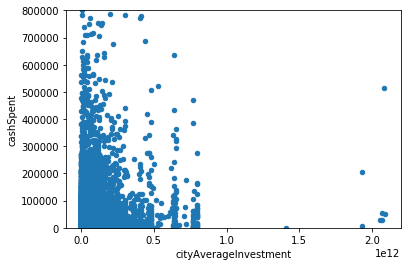

In [142]:
#scatter plot cityAverageInvestment/cashSpent
var = 'cityAverageInvestment'
data = pd.concat([df_train['cashSpent'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='cashSpent', ylim=(0,800000));

Relationship with categorical features

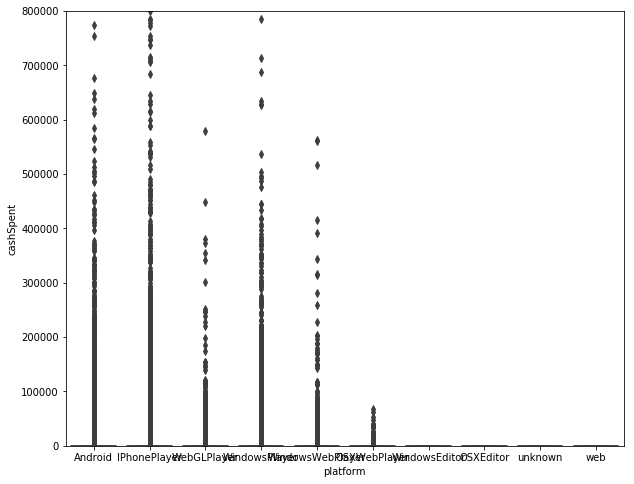

In [143]:
#box plot platform/saleprice
var = 'platform'
data = pd.concat([df_train['cashSpent'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="cashSpent", data=data)
fig.axis(ymin=0, ymax=800000);

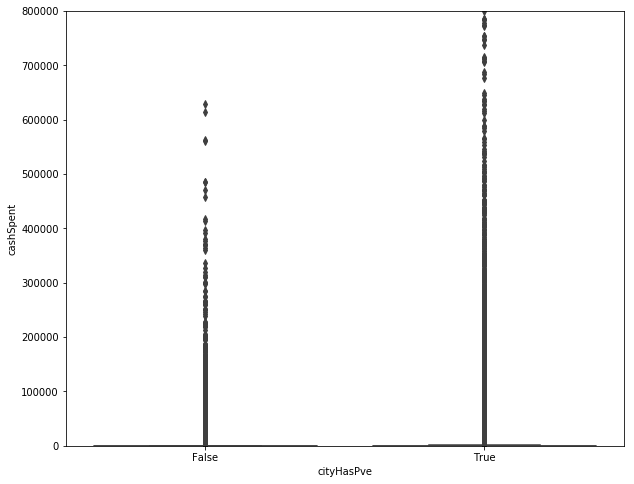

In [144]:
#box plot cityHasPve/saleprice
var = 'cityHasPve'
data = pd.concat([df_train['cashSpent'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="cashSpent", data=data)
fig.axis(ymin=0, ymax=800000);

Correlation Matrix 


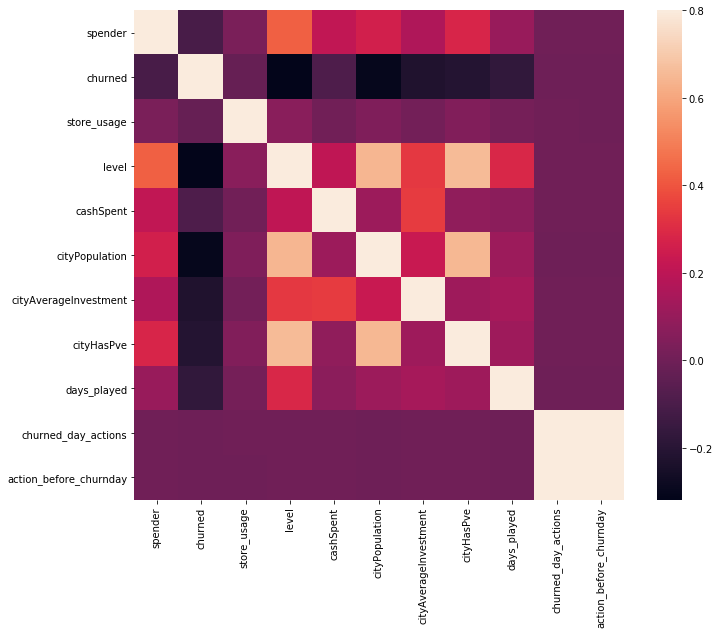

In [145]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


From this heat map of correlation, we can tell that the variable 'churned_day_actions' and 'actions_before_churnedday' are highly corelated. 

In [146]:
#standardizing data
cashspent_scaled = StandardScaler().fit_transform(df_train['cashSpent'][:,np.newaxis]);
low_range = saleprice_scaled[cashspent_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[cashspent_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.08977772]
 [-0.08977772]
 [-0.08977772]
 [-0.08977772]
 [-0.08977772]
 [-0.08977772]
 [-0.08977772]
 [-0.08977772]
 [-0.08977772]
 [-0.08977772]]

outer range (high) of the distribution:
[[ 92.48696458]
 [107.50686816]
 [110.21443274]
 [118.34202583]
 [119.12382232]
 [119.39242521]
 [135.26373915]
 [156.79105803]
 [168.14447016]
 [397.42334307]]


Continue plotting the data and tranform the data 

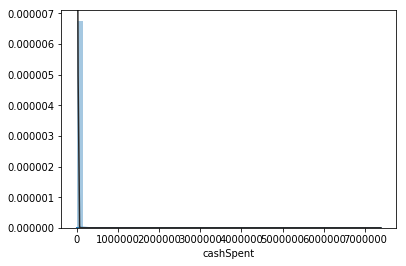

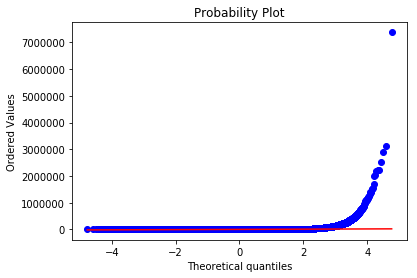

In [147]:
#histogram and normal probability plot
sns.distplot(df_train['cashSpent'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['cashSpent'], plot=plt)

# Explore the dataset 


Only keep the numerical variables and form a new dataset to do further test


In [148]:
new_df = df.drop(df.columns[[0,1,2,5,7,10,12,13]], axis=1)
new_df

,store_usage,level,cashSpent,cityPopulation,cityAverageInvestment,days_played
0,0.00,1,0,1,0,60
1,0.00,1,0,1,0,14
2,0.00,1,0,1,0,36
3,0.00,1,0,1,0,24
4,0.00,1,0,1,0,29
5,0.00,1,0,1,0,22
6,0.00,1,0,1,0,15
7,0.00,1,0,1,0,67
8,0.00,1,0,1,0,11
9,0.00,1,0,1,0,36


In [152]:
#applying log transformation and drop NaN  
new_df['cashSpent'] = np.log(new_df['cashSpent'])
new_df = new_df.dropna(axis='rows')

new_df

,store_usage,level,cashSpent,cityPopulation,cityAverageInvestment,days_played
4475,0.00,1,0.510691,1,0,44
6704,0.00,1,0.721322,1,0,214
8532,0.00,1,0.749295,1,0,103
13655,0.00,1,0.687930,1,0,338
14874,0.00,1,0.687930,1,0,120
18792,0.00,1,0.510691,1,0,22
22904,0.00,1,0.749295,1,0,41
26381,0.00,1,0.510691,1,0,312
28393,0.00,1,0.658814,1,0,174
30352,0.00,1,0.749295,1,0,20


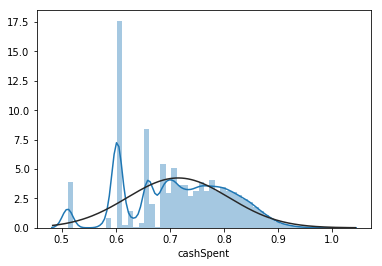

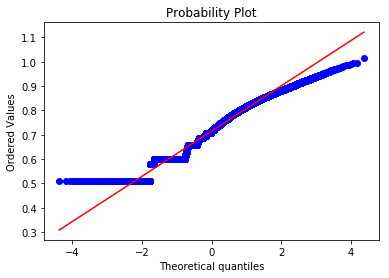

In [153]:
#transformed histogram and normal probability plot
sns.distplot(new_df['cashSpent'], fit=norm);
fig = plt.figure()
res = stats.probplot(new_df['cashSpent'], plot=plt)

Test homoscedasticity for two metric variables

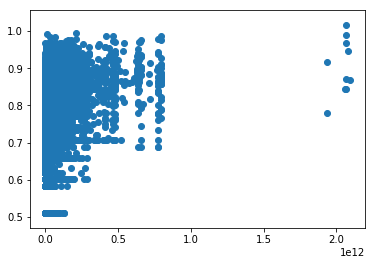

In [154]:
#scatter plot
plt.scatter(new_df['cityAverageInvestment'], new_df['cashSpent']);

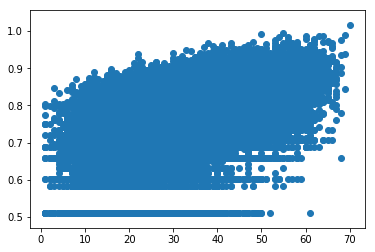

In [155]:
#scatter plot
plt.scatter(new_df['level'], new_df['cashSpent']);
